In [2]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#File to load
cab_data_path = "Resources/cleaned_Kaggle_Data.csv"

#Read the Cab data
cleaned_cab_df = pd.read_csv(cab_data_path)

#Display the cab_df file for preview
cleaned_cab_df

,Distance,Company,Destination,Source,Price,Day of Week
0,0.44,Lyft,North Station,Haymarket Square,5.0,6
1,0.44,Lyft,North Station,Haymarket Square,11.0,1
2,0.44,Lyft,North Station,Haymarket Square,7.0,2
3,0.44,Lyft,North Station,Haymarket Square,26.0,4
4,0.44,Lyft,North Station,Haymarket Square,9.0,3
...,...,...,...,...,...,...
637971,1.00,Uber,North End,West End,9.5,5
637972,1.00,Uber,North End,West End,13.0,5
637973,1.00,Uber,North End,West End,9.5,5
637974,1.00,Uber,North End,West End,27.0,5


In [3]:
#Print research question
print('How do ride distance and ride price compare across the various ride sources?')

How do ride distance and ride price compare across the various ride sources?


In [4]:
grouped_by_source = cleaned_cab_df.groupby('Source')
grouped_by_destination = cleaned_cab_df.groupby('Destination')

source_counts = grouped_by_source.count()['Distance']
destination_counts = grouped_by_destination.count()['Distance']
source_average_price = grouped_by_source['Price'].mean()
destination_average_price = grouped_by_destination['Price'].mean()
source_average_distance = grouped_by_source['Distance'].mean()
destination_average_distance = grouped_by_destination['Distance'].mean()

grouped_location_summary = pd.concat([source_counts, destination_counts, source_average_price, destination_average_price, source_average_distance,destination_average_distance ], axis = 1)
grouped_location_summary.columns = ['Count as Source', 'Count as Destination', 'Average Price as Source', 'Average Price as Destination', 'Average Distance as Source', 'Average Distance as Destination']
grouped_location_summary

,Count as Source,Count as Destination,Average Price as Source,Average Price as Destination,Average Distance as Source,Average Distance as Destination
Back Bay,53201,53190,16.047394,16.210152,1.981815,2.085002
Beacon Hill,52841,52840,15.664030,16.248335,2.035296,2.214378
Boston University,53172,53171,18.853034,18.942137,3.051155,3.023516
Fenway,53166,53166,18.379491,18.146419,2.811519,2.866372
Financial District,54197,54192,18.181372,18.046280,2.708317,2.584741
Haymarket Square,53147,53171,13.578114,14.255553,1.120289,1.331153
North End,53171,53164,15.153373,15.002210,1.610733,1.637896
North Station,52576,52577,16.364006,16.805238,2.218849,2.226485
Northeastern University,53164,53165,17.901124,17.827517,2.722848,2.640654
South Station,53160,53159,15.672479,14.828549,1.842061,1.612408


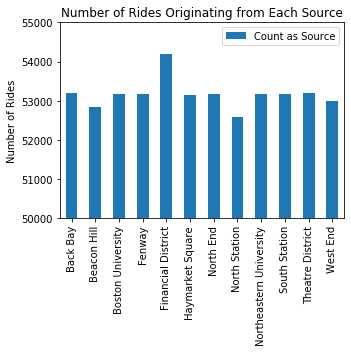

In [6]:
#Pull the relevent data into a dataframe
count_as_source_series = pd.DataFrame(grouped_location_summary['Count as Source'])

#Create a bar graph showing the number of rides originating from each source
count_as_source_series.plot(kind = 'bar', figsize = (5,5))

#Format the bar graph
plt.title("Number of Rides Originating from Each Source")
plt.ylabel("Number of Rides")
plt.xlim(-.5, len(count_as_source_series)-.5)
plt.ylim(50000, 55000)
plt.tight_layout()
    #https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot

#Save the figure
plt.savefig('Figures/count_as_source.png')

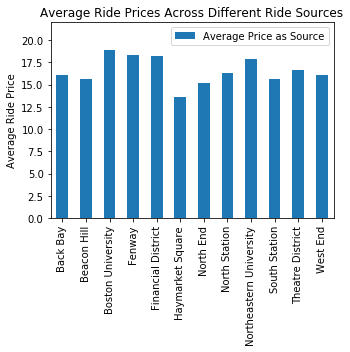

In [7]:
#Pull the relevent data into a dataframe
price_as_source_series = pd.DataFrame(grouped_location_summary['Average Price as Source'])

#Create a bar graph showing the average ride price of rides originating from each each source
price_as_source_series.plot(kind = 'bar', figsize = (5,5))

#Format the bar graph
plt.title("Average Ride Prices Across Different Ride Sources")
plt.ylabel('Average Ride Price')
plt.xlim(-.5, len(price_as_source_series)-.5)
plt.ylim(0, 22)
plt.tight_layout()

#Save the figure
plt.savefig('Figures/price_as_source.png')

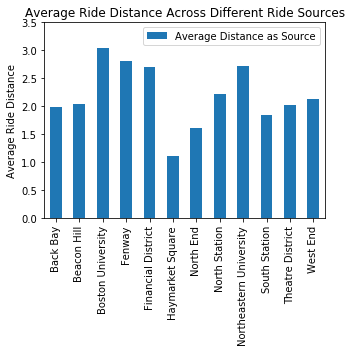

In [8]:
#Pull the relevent data into a dataframe
distance_as_source_series = pd.DataFrame(grouped_location_summary['Average Distance as Source'])

#Create a bar graph showing the average ride distance of rides originating from each each source
distance_as_source_series.plot(kind = 'bar', figsize = (5,5))

#Format the bar graph
plt.title('Average Ride Distance Across Different Ride Sources')
plt.ylabel('Average Ride Distance')
plt.xlim(-.5, len(distance_as_source_series)-.5)
plt.ylim(0, 3.5)
plt.tight_layout()

#Save the figure
plt.savefig('Figures/distance_as_source.png')

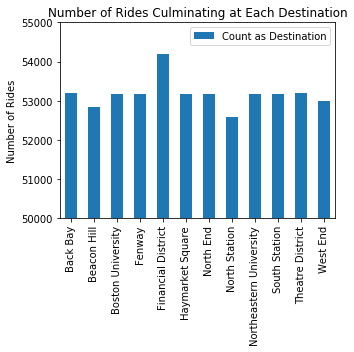

In [9]:
#Pull the relevent data into a dataframe
count_as_destination_series = pd.DataFrame(grouped_location_summary['Count as Destination'])

#Create a bar graph showing the number of rides culminating at each destination
count_as_destination_series.plot(kind = 'bar', figsize = (5,5))

#Format the bar graph
plt.title("Number of Rides Culminating at Each Destination")
plt.ylabel("Number of Rides")
plt.xlim(-.5, len(count_as_source_series)-.5)
plt.ylim(50000, 55000)
plt.tight_layout()

#Save the figure
plt.savefig('Figures/count_as_destination.png')

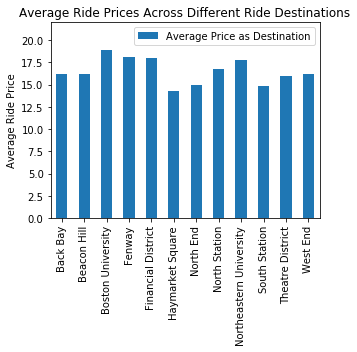

In [10]:
#Pull the relevent data into a dataframe
price_as_destination_series = pd.DataFrame(grouped_location_summary['Average Price as Destination'])

#Create a bar graph showing the average ride price of rides culminating at each destination
price_as_destination_series.plot(kind = 'bar', figsize = (5,5))


#Format the bar graph
plt.title('Average Ride Prices Across Different Ride Destinations')
plt.ylabel('Average Ride Price')
plt.xlim(-.5, len(price_as_destination_series)-.5)
plt.ylim(0, 22)
plt.tight_layout()

#Save the figure
plt.savefig('Figures/price_as_destination.png')

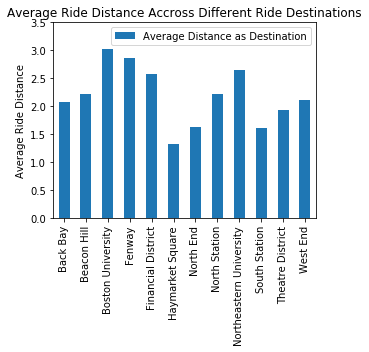

In [11]:
#Pull the relevent data into a dataframe
distance_as_destination_series = pd.DataFrame(grouped_location_summary['Average Distance as Destination'])

#Create a bar graph showing the average ride distance of rides culminating at each destination
distance_as_destination_series.plot(kind = 'bar', figsize = (5,5))

#Format the bar graph
plt.title('Average Ride Distance Accross Different Ride Destinations')
plt.ylabel('Average Ride Distance')
plt.xlim(-.5, len(distance_as_destination_series)-.5)
plt.ylim(0, 3.5)
plt.tight_layout()

#Save the figure
plt.savefig('Figures/distance_as_destination.png')

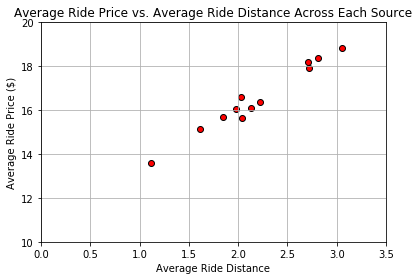

In [12]:
#Create a scatter plot of average ride price and average ride distance for each ride source
plt.scatter(grouped_location_summary['Average Distance as Source'], grouped_location_summary['Average Price as Source'], marker="o", facecolors="red", edgecolors="black")

#Format the scatter plot
plt.grid()
plt.title('Average Ride Price vs. Average Ride Distance Across Each Source')
plt.xlabel('Average Ride Distance')
plt.ylabel('Average Ride Price ($)')
plt.xlim(0, 3.5)
plt.ylim(10, 20)
plt.tight_layout()

#Save the figure
plt.savefig('Figures/price_distance_scatterplot.png')

The coorelation coefficient between Average Ride Price and Average Ride Distance is 0.99
The line of best fit is y = 2.73x + 10.56


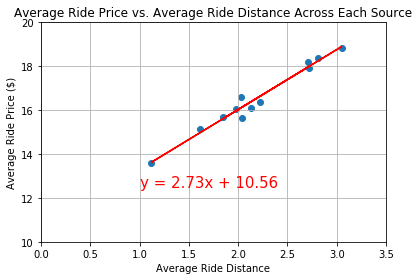

In [16]:
#Perform a linear regression analysis of average ride price and averagre ride distance for each ride source

#Calculate and print the Pearson coorelation coefficient
print(f"The coorelation coefficient between Average Ride Price and Average Ride Distance is {round(st.pearsonr(grouped_location_summary['Average Distance as Source'],grouped_location_summary['Average Price as Source'])[0],2)}")

#Create a linear regression equation and place the line of best fit on the scatter plot
x_values = grouped_location_summary['Average Distance as Source']
y_values = grouped_location_summary['Average Price as Source']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Format the scatter plot
plt.grid()
plt.title('Average Ride Price vs. Average Ride Distance Across Each Source')
plt.xlabel('Average Ride Distance')
plt.ylabel('Average Ride Price ($)')
plt.xlim(0, 3.5)
plt.ylim(10, 20)
plt.tight_layout()

#Print the equation of the linear regression model
print(f"The line of best fit is {line_eq}")

#Print the scatterplot with the line of best fit superimposed on it
plt.annotate(line_eq,(1,12.5),fontsize=15,color="red")

#Save the figure
plt.savefig('Figures/price_distance_regression.png')